[Jardinería](https://josejuansanchez.org/bd/ejercicios-consultas-sql/index.html#jardiner%C3%ADa)

# Consultas a una tabla




In [ ]:
1.- conocer las formas de pago de la jardinería
SELECT DISTINCT forma_pago
FROM pago


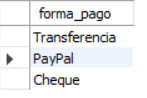

In [ ]:
2.- Identificar los métodos de pago con más recaudación (se usa variable agregada y se renombra)
SELECT forma_pago, SUM(total) as Ventas_totales
FROM pago
GROUP BY forma_pago;

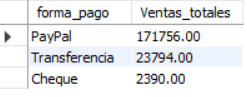

In [ ]:
3.- Localizar a los países con más clientes
SELECT pais, COUNT(codigo_cliente) as Clientes_totales
FROM cliente
GROUP BY pais
ORDER BY Clientes_totales DESC;

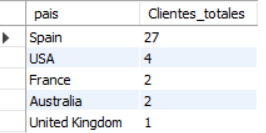

In [ ]:
4.- Conocer los productos de la gama "Herramientas" y sus precios de venta
SELECT nombre, precio_venta
FROM producto
WHERE gama = 'Herramientas'

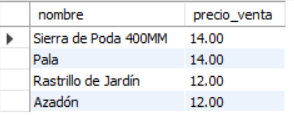

# Consultas a múltiples tablas (Join)

In [ ]:
1.- identificar en qué ciudades se vende más (top 5)
SELECT o.ciudad, SUM(p.total) AS total_pagos
FROM pago AS p
JOIN cliente AS c ON p.codigo_cliente = c.codigo_cliente
JOIN empleado AS e ON c.codigo_empleado_rep_ventas = e.codigo_empleado
JOIN oficina AS o ON e.codigo_oficina = o.codigo_oficina
GROUP BY o.ciudad
ORDER BY total_pagos DESC
LIMIT 5;

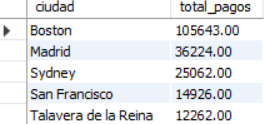

In [ ]:
2.-Oficinas que menos cumplen con fecha de entrega, basándose en la suma de productos
SELECT o.ciudad, o.codigo_oficina, SUM(dp.cantidad) AS total_productos_entregados_fuera_de_tiempo
FROM pedido AS p
LEFT JOIN cliente AS c ON p.codigo_cliente = c.codigo_cliente
LEFT JOIN empleado AS e ON c.codigo_empleado_rep_ventas = e.codigo_empleado
LEFT JOIN oficina AS o ON e.codigo_oficina = o.codigo_oficina
LEFT JOIN detalle_pedido AS dp ON p.codigo_pedido = dp.codigo_pedido
WHERE p.fecha_entrega > p.fecha_esperada
GROUP BY o.codigo_oficina, o.ciudad
ORDER BY total_productos_entregados_fuera_de_tiempo DESC;

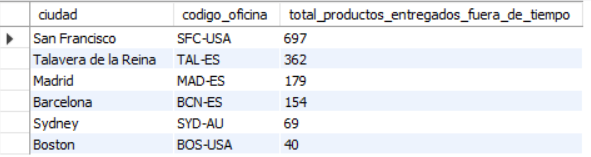

In [ ]:
3.- Empleados con sucursal que más vendieron en 2009
SELECT e.nombre, e.apellido1, o.ciudad AS sucursal, SUM(p.total) AS total_ventas
FROM pago AS p
JOIN cliente AS c ON p.codigo_cliente = c.codigo_cliente
JOIN empleado AS e ON c.codigo_empleado_rep_ventas = e.codigo_empleado
JOIN oficina AS o ON e.codigo_oficina = o.codigo_oficina
WHERE YEAR(p.fecha_pago) = 2009
GROUP BY e.codigo_empleado, o.ciudad
ORDER BY total_ventas DESC
LIMIT 10;

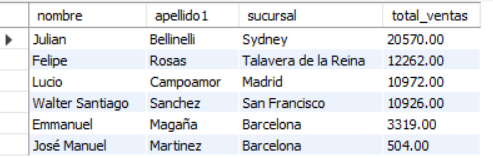

In [ ]:
4- Top 20 de productos que nunca se han entregado (suma de pedidos sin fecha de entrega)
SELECT p.nombre AS nombre_producto, SUM(dp.cantidad) AS total_cantidad_pedida
FROM producto AS p
JOINdetalle_pedido AS dp ON p.codigo_producto = dp.codigo_producto
JOIN pedido AS ped ON dp.codigo_pedido = ped.codigo_pedido
WHERE ped.fecha_entrega IS NULL
GROUP BY p.nombre
ORDER BY total_cantidad_pedida DESC
LIMIT 20;

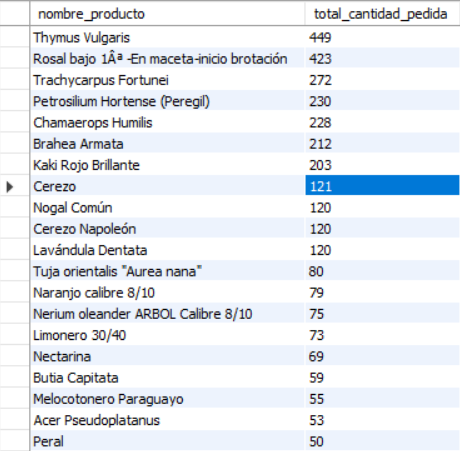